# Pytorch Examples

In [ ]:
import torch
import torch.nn as nn
import torch.autograd as auto
import torch.optim as optim
import torch.functional as F
import torch.utils.data.dataset
import torch.utils.data.dataloader

In [ ]:
x=torch.tensor([[0,1],[1,1],[1,0],[0,0]],dtype=torch.float32)
y=torch.tensor([[1],[1],[1],[0]],dtype=torch.float32)

In [ ]:
class Sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.func=nn.Sequential(
            nn.Linear(2,2),
            nn.ReLU(),
            #F.relu(),
            nn.Linear(2,1),
            nn.Sigmoid(),
        )
    def forward(self,x):
      predict=self.func(x)
      return predict

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Input layer to first hidden layer
        self.relu = nn.ReLU()            # Activation function for hidden layer
        self.output = nn.Linear(4, 1)    # First hidden layer to output layer
        self.sigmoid = nn.Sigmoid()      # Activation function for output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = XORModel()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent optimizer

In [ ]:
criterion=nn.MSELoss()
model=Sigmoid()
optimizer=optim.SGD(model.parameters(),lr=0.1)

In [ ]:
print(model)

In [ ]:
def train(x,y,model,optimizer,criterion):
  model.train()
  for epoch in range(1000):
    predict=model(x)
    loss=criterion(predict,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%100==0:
      print('epoch:',epoch,'loss:',loss.item())


In [ ]:
train(x,y,model,optimizer,criterion)

In [ ]:
model.eval()
t=model.forward(torch.tensor([1,1],dtype=torch.float32)).round()
print(t.item())

In [ ]:
x=torch.tensor([[0,1],[1,1],[1,0],[0,0]],dtype=torch.float32)
model.eval()
t=model.forward(torch.tensor(x,dtype=torch.float32)).round()
print(t.data)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y.data,t.data))

In [ ]:
y.data

In [ ]:
t.data

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:  # Check if the parameter is trainable
        print(f"{name}: {param.data}")

In [ ]:
print(torch.rand(4,2,dtype=torch.float32))

In [ ]:
def test(x,y):
  for _ in range(1000):
    #optimizer.ze
    predict=model(x)
    loss=(predict-y).pow(2).sum()
    with torch.no_grad:
      w.


In [ ]:
# prompt: initialize a optimizer variables for each of these optimizer algorithms 1.Batch gradient descent 2.Stochastic gradient descent 3.mini batch gradient descent 4.momentum method 5.adagrad 6.rmsprop 7.adam , and for each optimizer how my data is look like

import torch
import torch.nn as nn
import torch.optim as optim

# ... (your existing code)

# Optimizer initialization and data descriptions
optimizers = {
    "Batch Gradient Descent": optim.SGD(model.parameters(), lr=0.1),
    "Stochastic Gradient Descent": optim.SGD(model.parameters(), lr=0.1),
    "Mini-Batch Gradient Descent": optim.SGD(model.parameters(), lr=0.1),
    "Momentum": optim.SGD(model.parameters(), lr=0.1, momentum=0.9),
    "Adagrad": optim.Adagrad(model.parameters(), lr=0.1),
    "RMSprop": optim.RMSprop(model.parameters(), lr=0.1),
    "Adam": optim.Adam(model.parameters(), lr=0.001)  # Typically a lower learning rate for Adam
}


for name, optimizer in optimizers.items():
    print(f"\nOptimizer: {name}")
    print(f"Data Description:  {x.shape} input features, and {y.shape} target values.")
    print("Data Example (x): ",x)
    print("Data Example (y): ",y)

# Example usage of an optimizer
# (You would typically use a loop here to iterate and update weights)
# optimizer = optimizers["Adam"]  # Choose your optimizer

#Example training with an optimizer.
def train_with_optimizer(x,y,model,optimizer,criterion):
  model.train()
  for epoch in range(100):
    predict=model(x)
    loss=criterion(predict,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%10==0:
      print('epoch:',epoch,'loss:',loss.item())

#train_with_optimizer(x,y,model, optimizers["Adam"],criterion)
# ... (rest of your code)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # 100 samples from 0 to 10
y = 2 * x + 1 + np.random.randn(100, 1) * 2  # Linear relation with noise

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(x, dtype=torch.float32)
Y_train = torch.tensor(y, dtype=torch.float32)

# Step 2: Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature and one output

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
model = LinearRegressionModel()

# Step 3: Set up the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Step 4: Train the model using SGD
epochs = 1000
losses = []

for epoch in range(epochs):
    # Shuffle data at the beginning of each epoch for stochasticity
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    Y_train_shuffled = Y_train[indices]

    for i in range(len(X_train)):
        # Forward pass: Compute predicted y by passing X_train through the model
        Y_pred = model(X_train_shuffled[i].view(1, -1))

        # Compute and print loss
        loss = criterion(Y_pred, Y_train_shuffled[i].view(1, -1))
        losses.append(loss.item())

        # Zero gradients before backward pass
        optimizer.zero_grad()

        # Backward pass: Compute gradients of the loss with respect to model parameters
        loss.backward()

        # Update parameters using gradients
        optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plotting the loss over epochs
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Visualizing the results
with torch.no_grad():
    predicted = model(X_train).numpy()

plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, predicted, color='red', label='Fitted line')
plt.title('Linear Regression Result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # 100 samples from 0 to 10
y = 2 * x + 1 + np.random.randn(100, 1) * 2  # Linear relation with noise

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(x, dtype=torch.float32)
Y_train = torch.tensor(y, dtype=torch.float32)

# Step 2: Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature and one output

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
model = LinearRegressionModel()

# Step 3: Set up the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Step 4: Train the model using SGD and track parameter updates
epochs = 1000
losses = []
params_history = []

for epoch in range(epochs):
    for i in range(len(X_train)):
        # Forward pass: Compute predicted y by passing X_train through the model
        Y_pred = model(X_train[i].view(1, -1))

        # Compute loss
        loss = criterion(Y_pred, Y_train[i].view(1, -1))
        losses.append(loss.item())

        # Zero gradients before backward pass
        optimizer.zero_grad()

        # Backward pass: Compute gradients of the loss with respect to model parameters
        loss.backward()

        # Update parameters using gradients
        optimizer.step()

        # Store parameters for visualization
        params_history.append(model.linear.weight.item())
        params_history.append(model.linear.bias.item())

# Step 5: Plotting results

# Plotting loss over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting parameter updates in parameter space (weight vs bias)
weights = params_history[::2]   # Extract weights from history
biases = params_history[1::2]    # Extract biases from history

plt.subplot(1, 2, 2)
plt.plot(weights, biases, marker='o')
plt.title('Parameter Space Trajectory')
plt.xlabel('Weight')
plt.ylabel('Bias')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Define a simple quadratic loss function
def loss_function(w, b):
    return (w ** 2 + b ** 2)  # Simple bowl shape

# Step 2: Generate a grid for weights and biases
w_range = np.linspace(-3, 3, 100)
b_range = np.linspace(-3, 3, 100)
W, B = np.meshgrid(w_range, b_range)
L = loss_function(W, B)

# Step 3: Initialize parameters for SGD
w = torch.tensor(2.0, requires_grad=True)  # Initial weight
b = torch.tensor(2.0, requires_grad=True)  # Initial bias
learning_rate = 0.1
epochs = 50

# Store paths for plotting
path_w = []
path_b = []

# Step 4: Perform Stochastic Gradient Descent
for epoch in range(epochs):
    # Calculate loss
    loss = loss_function(w, b)

    # Zero gradients before backward pass
    w.grad = None
    b.grad = None

    # Compute gradients
    loss.backward()

    # Update parameters using SGD
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Store the path taken by w and b
    path_w.append(w.item())
    path_b.append(b.item())

# Step 5: Plotting the loss surface and SGD path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the loss surface
ax.plot_surface(W, B, L, cmap='viridis', alpha=0.7)

# Plotting the path taken by SGD on top of the surface
ax.plot(path_w, path_b, loss_function(torch.tensor(path_w), torch.tensor(path_b)), color='r', marker='o')

ax.set_title('Loss Function Surface with SGD Path')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Define a simple quadratic loss function
def loss_function(w, b):
    return (w ** 2 + b ** 2)  # Simple bowl shape

# Step 2: Generate a grid for weights and biases
w_range = np.linspace(-3, 3, 100)
b_range = np.linspace(-3, 3, 100)
W, B = np.meshgrid(w_range, b_range)
L = loss_function(W, B)

# Step 3: Initialize parameters for SGD
w = torch.tensor(2.0, requires_grad=True)  # Initial weight
b = torch.tensor(2.0, requires_grad=True)  # Initial bias
learning_rate = 0.1
epochs = 50

# Store paths for plotting
path_w = []
path_b = []

# Step 4: Perform Stochastic Gradient Descent
for epoch in range(epochs):
    # Simulate stochastic updates by selecting a random data point (in this case, just using w and b)
    # In practice, you would use a single sample from your dataset.

    # Calculate loss for the current parameters
    loss = loss_function(w, b)

    # Zero gradients before backward pass
    w.grad = None
    b.grad = None

    # Compute gradients
    loss.backward()

    # Update parameters using SGD
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Store the path taken by w and b
    path_w.append(w.item())
    path_b.append(b.item())

# Step 5: Plotting the loss surface and SGD path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the loss surface
ax.plot_surface(W, B, L, cmap='viridis', alpha=0.7)

# Plotting the path taken by SGD on top of the surface
ax.plot(path_w, path_b, loss_function(torch.tensor(path_w), torch.tensor(path_b)), color='r', marker='o')

ax.set_title('Loss Function Surface with SGD Path')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Define a simple quadratic loss function
def loss_function(w, b):
    return (w ** 2 + b ** 2)  # Simple bowl shape

# Step 2: Generate a grid for weights and biases
w_range = np.linspace(-3, 3, 100)
b_range = np.linspace(-3, 3, 100)
W, B = np.meshgrid(w_range, b_range)
L = loss_function(W, B)

# Step 3: Initialize parameters for Batch Gradient Descent
w = torch.tensor(2.0, requires_grad=True)  # Initial weight
b = torch.tensor(2.0, requires_grad=True)  # Initial bias
learning_rate = 0.1
epochs = 50

# Store paths for plotting
path_w = []
path_b = []

# Step 4: Perform Batch Gradient Descent
for epoch in range(epochs):
    # Calculate loss for the current parameters (using batch)
    loss = loss_function(w, b)

    # Zero gradients before backward pass
    w.grad = None
    b.grad = None

    # Compute gradients
    loss.backward()

    # Update parameters using Batch Gradient Descent
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Store the path taken by w and b
    path_w.append(w.item())
    path_b.append(b.item())

# Step 5: Plotting the loss surface and Batch Gradient Descent path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the loss surface
ax.plot_surface(W, B, L, cmap='viridis', alpha=0.7)

# Plotting the path taken by Batch Gradient Descent on top of the surface
ax.plot(path_w, path_b, loss_function(torch.tensor(path_w), torch.tensor(path_b)), color='r', marker='o')

ax.set_title('Loss Function Surface with Batch Gradient Descent Path')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Step 1: Generate synthetic data
# For this example, we'll create a simple dataset
np.random.seed(42)
x_train = np.random.rand(100, 1) * 10  # 100 samples from 0 to 10
y_train = 2 * x_train + 1 + np.random.randn(100, 1) * 0.5  # Linear relation with noise

# Convert numpy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Create a DataLoader for batching
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Step 2: Define a simple linear regression model using nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature and one output

    def forward(self, x):
        return self.linear(x)

# Step 3: Initialize the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Step 4: Train the model
epochs = 1000
for epoch in range(epochs):
    for xb, yb in train_loader:
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(xb)

        # Compute and print loss
        loss = criterion(y_pred, yb)

        # Zero gradients before backward pass
        optimizer.zero_grad()

        # Backward pass: Compute gradients of the loss with respect to model parameters
        loss.backward()

        # Update parameters using gradients
        optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 5: Evaluate the model (optional)
with torch.no_grad():
    x_test = torch.tensor([[5.0]], dtype=torch.float32)  # Test on a new sample
    prediction = model(x_test)
    print(f'Prediction for input {x_test.item()}: {prediction.item()}')

In [ ]:
x=torch.tensor([[0,1],[1,1],[1,0],[0,0]],dtype=torch.float32)
y=torch.tensor([[1],[1],[1],[0]],dtype=torch.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

x=torch.tensor([[0,1],[1,1],[1,0],[0,0]],dtype=torch.float32)
y=torch.tensor([[1],[1],[1],[0]],dtype=torch.float32)

# Define the neural network architecture
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Input layer to first hidden layer
        self.relu = nn.ReLU()            # Activation function for hidden layer
        self.output = nn.Linear(4, 1)    # First hidden layer to output layer
        self.sigmoid = nn.Sigmoid()      # Activation function for output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = XORModel()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent optimizer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the dataset
x = torch.tensor([[0, 1], [1, 1], [1, 0], [0, 0]], dtype=torch.float32)
y = torch.tensor([[1], [1], [1], [0]], dtype=torch.float32)

# Define the neural network architecture
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Input layer to first hidden layer
        self.relu = nn.ReLU()            # Activation function for hidden layer
        self.output = nn.Linear(4, 1)    # First hidden layer to output layer
        self.sigmoid = nn.Sigmoid()      # Activation function for output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = XORModel()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent optimizer

# Step 1: Generate a grid for weights and biases
w1_range = np.linspace(-3, 3, 100)  # Range for first weight (input to hidden)
w2_range = np.linspace(-3, 3, 100)  # Range for second weight (input to hidden)
W1, W2 = np.meshgrid(w1_range, w2_range)

# Step 2: Calculate loss for each combination of weights and biases
loss_values = np.zeros(W1.shape)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        with torch.no_grad():
            # Set model weights manually for visualization
            model.hidden.weight.data[0][0] = W1[i][j]  # First weight (input to hidden)
            model.hidden.weight.data[0][1] = W2[i][j]  # Second weight (input to hidden)
            model.output.weight.data[0][0] = -2.0      # Fixed output weight for visualization
            model.output.bias.data[0] = -2.0            # Fixed output bias for visualization

            # Compute loss over all data points
            y_pred = model(x)
            loss_values[i][j] = criterion(y_pred, y).item()

# Step 3: Perform Stochastic Gradient Descent and track the path taken by parameters
path_w1 = []
path_w2 = []

# Training loop for a few epochs to visualize SGD path on the surface
epochs = 50

for epoch in range(epochs):
    for i in range(len(x)):
        optimizer.zero_grad()   # Zero gradients before backward pass

        y_pred = model(x[i].view(1, -1))  # Forward pass on a single sample

        loss = criterion(y_pred, y[i].view(1, -1))  # Compute loss

        loss.backward()         # Backward pass

        optimizer.step()        # Update parameters

        path_w1.append(model.hidden.weight.data[0][0].item())
        path_w2.append(model.hidden.weight.data[0][1].item())

# Step 4: Plotting the loss surface and SGD path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the loss surface
ax.plot_surface(W1, W2, loss_values, cmap='viridis', alpha=0.7)

# Plotting the path taken by SGD on top of the surface
ax.plot(path_w1, path_w2,
         np.array([loss_function(torch.tensor([w1]), torch.tensor([w2]))
                   for w1, w2 in zip(path_w1, path_w2)]),
         color='r', marker='o')

ax.set_title('Loss Function Surface with SGD Path')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss')
plt.show()

In [ ]:
import torch.utils.data.dataset as dataset

In [ ]:
# prompt: import a dataset from dataset module after imported 'import torch.utils.data.dataset as dataset'

# Assuming 'dataset' is already imported as 'import torch.utils.data.dataset as dataset'
# and you have data in X_train and Y_train tensors

# Create a TensorDataset from your tensors
train_data = dataset.TensorDataset(X_train, Y_train)

# Create a DataLoader to handle batching and shuffling
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

# Now you can iterate over the DataLoader
for i, data in enumerate(train_loader):
    inputs, labels = data
    # ... your training logic here
    print(f"Batch {i+1}, Inputs shape: {inputs.shape}, Labels shape: {labels.shape}")

In [ ]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader

In [ ]:
class DataSet(dataset.Dataset):
    def __init__(self,x):
        self.data=pd.read_csv(x)
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        features = self.data.iloc[idx, :-1].values  # All columns except the last
        target = self.data.iloc[idx, -1]            # Last column
        return torch.tensor(features, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

In [ ]:
dk=DataSet('/content/sample_data/california_housing_train.csv')

In [ ]:
for i in range(5):  # Print first 5 samples
    features, target = dk[i]
    print(f"Sample {i}: Features = {features.numpy()}, Target = {target.item()}")

In [ ]:
dataloader=DataLoader(dk,batch_size=32, shuffle=True)

In [ ]:
dataloader

In [ ]:
for batch_idx, (features, targets) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}:")
    print("Features:\n", features)
    print("Targets:\n", targets)
    print("-" * 50)  # Separator for clarity

    # Optionally break after printing a few batches for brevity
    if batch_idx >= 4:  # Change this number based on how many batches you want to see
        break

In [ ]:
class Spam(dataset.Dataset):
  def __init__(self,file):
    with open(file,'r') as file:
      lines=file.readlines()
      lines=[line.strip() for line in lines]
      self.data=pd.DataFrame(lines,columns=['label','text'])

  def __len__(self):
    return len(self.data)
  def __getitem__(self, index):
    label=self.data.iloc[index]['label']
    message=self.data.iloc[index]['text']
    return label,message

In [ ]:
dataset=Spam('spam.csv')

# Pytorch by Tsingua

## pytorch Installation

In [ ]:
!pip install torch

## Working With Tensors

In [ ]:
import torch
import numpy as np

In [ ]:
t1=torch.tensor([1,2,3])

In [ ]:
t1

In [ ]:
array1=np.arange(12).reshape(3,4)

In [ ]:
array1

In [ ]:
empty=torch.empty(3,4)

In [ ]:
ones=torch.ones(3,4)

In [ ]:
zeros=torch.zeros(3,4)

In [ ]:
rand=torch.rand(3,4)

In [ ]:
ones_like=torch.ones_like(empty)

In [ ]:
list=['empty','ones','zeros','rand','ones_like']
for j in range(5):
  print(eval(list[j]))

In [ ]:
rand=torch.randint(3,4,(2,2))

In [ ]:
rand

In [ ]:
tensor=torch.tensor(np.arange(10).reshape(2,5))

In [ ]:
tensor

In [ ]:
tensor.data

.item() fucntion is used to get the scaler value only from the tensor <br>
if you want to get multiple scaler values or tensor data then you have to use .data

In [ ]:
tensor.numpy()

In [ ]:
tensor.size()

In [ ]:
tensor.shape[1]

In [ ]:
tensor.dim()

In [ ]:
tensor.view(5,2)

In [ ]:
tensor.max()

In [ ]:
tensor.median()

In [ ]:
t=tensor.to(dtype=torch.float32)

In [ ]:
def compute_std(tensor):
    # Check if the tensor is a floating point type
    if not torch.is_floating_point(tensor):
        print(f"Converting tensor of type {tensor.dtype} to float.")
        tensor = tensor.float()  # Convert to float if it's not

    std_value = tensor.std()  # Calculate standard deviation
    return std_value

In [ ]:
compute_std(tensor)

In [ ]:
t.std()

In [ ]:
tensor.shape

In [ ]:
tensor.t()

In [ ]:
tensor

In [ ]:
tensor.permute(1,0)

In [ ]:
tensor[:1]

In [ ]:
tensor[:,1]

## dtypes

In [ ]:
tensor.dtype

In [ ]:
help(torch.tensor)

In [ ]:
torch.FloatTensor(1)

In [ ]:
tensor.type(torch.float32)

In [ ]:
tensor.double()

## Tensor

In [ ]:
import torch

In [ ]:
x=torch.rand(5,5)

In [ ]:
x.type(torch.float32)

In [ ]:
x.dtype

In [ ]:
y=torch.rand(5,5,dtype=torch.float32)

In [ ]:
y

In [ ]:
x+y

In [ ]:
torch.add(x,y)

In [ ]:
x.add_(y)

## Working With NVIDIA CUDA

In [ ]:
if torch.cuda.is_available():
  print('cuda is available')
else:
  device=torch.device('cuda')

In [ ]:
print(torch.cuda.is_available())

In [ ]:
t = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
t

In [ ]:
if torch.cuda.is_available():
  device=torch.device('cuda')
  y=torch.torch.ones_liek(t,device=device)
  x=torch.to(device)
  z=x+y
  print(z)
  print(z.to('cpu',torch.double))
else:
  print('cuda is not available')

In [ ]:
torch.tensor([1,2],device='cuda:0')

## Loss Functions & Optimizers

w=w-(alpha*(gradient of w))

In [ ]:
import torch
x=torch.rand(2,2,requires_grad=True)

In [ ]:
x

In [ ]:
y=torch.ones([1,2])

In [ ]:
y

In [ ]:
k=x*2+1

In [ ]:
loss=torch.sum(k-y)**2

In [ ]:
loss.grad

In [ ]:
x.grad

In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt

x=torch.rand([50])
y=3*x+0.8

w=torch.rand(1,requires_grad=True)
b=torch.rand(1,requires_grad=True)
print(list([w,b]))
def loss(y,y_pred):
  return torch.mean((y_pred-y)**2)
  for i in range(100):
    y_pred=w*x+b
    l=loss(y,y_pred)
    l.backward
    with torch.no_grad():
      w-=0.01*w.grad
      b-=0.01*b.grad
      w.grad.zero_()

In [ ]:
w

In [ ]:
b

In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt

x=torch.rand([500,1])
y=3*x+0.8

In [ ]:
w=torch.rand(1,requires_grad=True)
b=torch.rand(1,requires_grad=True)

In [ ]:
x.shape

In [ ]:
w.shape

In [ ]:
ypred= torch.matmul(x,w)+b

In [ ]:
loss=(y-ypred).pow(2).mean()

In [ ]:
for i in range(500):
  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()
  loss.backward()
  w-=0.01*w.grad
  b-=0.01*b.grad

In [ ]:
optimizer=torch.optim.SGD([w,b],lr=0.01)
optimizer.zero_grad()
#loss=loss(y,ypred)
loss.backward()
optimizer.step()

## Artificial Neural Network

In [ ]:
from torch import nn

In [ ]:
class LR(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1,1)
  def forward(self,x):
    pred=self.linear(x)
    return pred

In [ ]:
model=LR()

In [ ]:
predict=model(x)

In [ ]:
predict

In [ ]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
def train(x,y,model,criterion,optimizer):
  model.train()
  for j in range(1000):
    y_pred=model(x)
    loss=criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if j%100==0:
      print(f'epoch:{j} loss:{loss.item()}')


In [ ]:
x=torch.randint(low=100,high=180,size=(100,1),dtype=torch.float32,device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

In [ ]:
y=torch.randint(low=10,high=90,size=(100,1),dtype=torch.float32,device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
train(x,y,model,criterion,optimizer)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
sns.scatterplot(x)

In [ ]:
plt.scatter(x,y)

In [ ]:
predict=model(x)

In [ ]:
plt.scatter(x.detach().numpy(), y.detach().numpy(), label='Data Points', color='blue')

# Plot predictions
plt.plot(x.detach().numpy(), predict.detach().numpy(), color='red', label='Predictions')

# Add labels and legend
plt.title("Scatter Plot with Predictions")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()

# Show the plot
plt.show()

**Model Implementation Template** <br>
1.import libraries <br>
2.data load<br>
3.data preparation<br>
4.Neural network intialization<br>
5.loss fuction<br>
6.optimizer<br>
7.model training<br>
8.model testing

In [ ]:
import torch

In [ ]:
from torch import nn
class lr(nn.Module):
  def __inti__(self):
    super(lr,self).__init__()
    self.linear=nn.Linear(1,1)
  def forward(self,x):
    pred=self.linear(x)
    return pred

## Dataset Creation

for doing with the data you need to import **torch.utils.data.Dataset**

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [ ]:
class Cifar(Dataset):
  def __init__(self,file):
    lines=open(file,'r').readlines()
    lines=[line.strip() for line in lines]
    self.data=pd.DataFrame(lines,columns=['label','text'])
  def __len__(self):
    return len(self.data)
  def __getitem__(self,idx):
    label=self.data.iloc[idx]['label']
    text=self.data.iloc[idx]['text']
    return label,text

In [ ]:
dataloader=DataLoader(data,batch_size=32,shuffle=True)

In [ ]:
for i in dataloader:
  print(i)

## TorchVision Datasets

In [ ]:
import torchvision.datasets.mnist as mnist

In [ ]:
# prompt: import transform from torchvision

import torchvision.transforms as transforms

In [ ]:
data=mnist.MNIST(root='./data',train=True,download=True,transform=transforms.ToTensor())

In [ ]:
data[0][0]

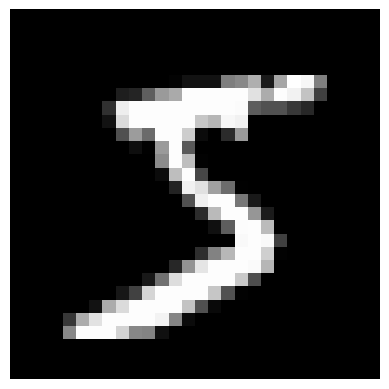

In [43]:
import matplotlib.pyplot as plt

# Assuming 'data' is your tensor and you want to display the first element of the first image
# Check if data[0][0] has shape (1, 28, 28)
image_tensor = data[0][0]  # This should be of shape (1, 28, 28)

# Squeeze the tensor to remove the channel dimension
image = image_tensor.squeeze(0)  # Now it should be of shape (28, 28)

# Display the image
plt.imshow(image.numpy(), cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Optional: turn off axis labels
plt.show()

In [47]:
import torchvision as vision
dataset=vision.datasets.MNIST(root='./data',train=True,download=True,transform=None)

In [51]:
print(dataset[0][0])

<PIL.Image.Image image mode=L size=28x28 at 0x7E43F96FA530>


In [48]:
print(dataset[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x7E43F937CBE0>, 5)


In [49]:
img=dataset[0][0]

In [50]:
img.show()

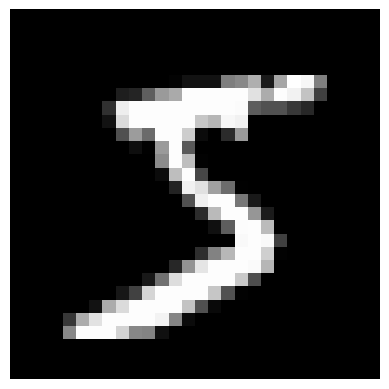

In [55]:
# prompt: using this code print the image 'from PIL import Image
# from IPython.display import display
# # Assuming 'data' is your tensor and you want to display the first element of the first image
# # Access the image from data
# image_tensor = data[0][0]  # This should be a PIL Image object
# # If image_tensor is a PIL Image, you can directly display it
# display(image_tensor)'

from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# Assuming 'data' is your tensor and you want to display the first element of the first image
# Check if data[0][0] has shape (1, 28, 28)
image_tensor = data[0][0]  # This should be of shape (1, 28, 28)

# Squeeze the tensor to remove the channel dimension
image = image_tensor.squeeze(0)  # Now it should be of shape (28, 28)

# Display the image
plt.imshow(image.numpy(), cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Optional: turn off axis labels
plt.show()

In [56]:
transform.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [58]:
import torchvision.transforms as transform

In [67]:
import torchvision

In [68]:
transform.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [69]:
data=torchvision.datasets.MNIST(root='./data/',train=True,download=True,transform=transforms)

In [70]:
dataloader=DataLoader(data,batch_size=32,shuffle=True)

In [71]:
for j in enumerate(dataloader):
  print(j)

TypeError: 'module' object is not callable

## Activation Functions

In [72]:
import torch.nn.functional as F

In [78]:
b=torch.tensor([-2,-1,0,1,2])

In [80]:
F.relu(b)

tensor([0, 0, 0, 1, 2])

In [ ]:
F.log_softmax(x,dim=1)

In [ ]:
# prompt: what are the different types of loss functions are available in torch library and initalize for each variable

import torch
import torch.nn as nn

# Initialize loss functions with example input tensors
# You'll need to replace these with your actual data shapes

# For regression tasks:
# Mean Squared Error (MSE)
mse_loss = nn.MSELoss()
example_input_regression = torch.randn(10, 1)  # Example: 10 samples, 1 output
example_target_regression = torch.randn(10, 1)
mse_loss_value = mse_loss(example_input_regression, example_target_regression)
print(f"MSE Loss: {mse_loss_value}")


# Mean Absolute Error (MAE)
mae_loss = nn.L1Loss()
mae_loss_value = mae_loss(example_input_regression, example_target_regression)
print(f"MAE Loss: {mae_loss_value}")

# Smooth L1 Loss
smooth_l1_loss = nn.SmoothL1Loss()
smooth_l1_loss_value = smooth_l1_loss(example_input_regression, example_target_regression)
print(f"Smooth L1 Loss: {smooth_l1_loss_value}")


# For binary classification tasks:
# Binary Cross Entropy (BCE)
bce_loss = nn.BCELoss()
example_input_binary = torch.sigmoid(torch.randn(10, 1))  # Example: 10 samples, 1 output (sigmoid output)
example_target_binary = torch.randint(0, 2, (10, 1), dtype=torch.float32) # Example targets (0 or 1)
bce_loss_value = bce_loss(example_input_binary, example_target_binary)
print(f"BCE Loss: {bce_loss_value}")

# For multi-class classification tasks:
# Cross Entropy (CE)
ce_loss = nn.CrossEntropyLoss()
example_input_multiclass = torch.randn(10, 5)  # Example: 10 samples, 5 classes (logits)
example_target_multiclass = torch.randint(0, 5, (10,)) # Example targets (class indices)
ce_loss_value = ce_loss(example_input_multiclass, example_target_multiclass)
print(f"Cross Entropy Loss: {ce_loss_value}")


# Negative Log Likelihood Loss (NLL) - Use with log_softmax
nll_loss = nn.NLLLoss()
example_input_nll = F.log_softmax(torch.randn(10,5), dim=1)
example_target_nll = torch.randint(0, 5, (10,))
nll_loss_value = nll_loss(example_input_nll, example_target_nll)
print(f"NLL Loss: {nll_loss_value}")

# KL Divergence
kl_div_loss = nn.KLDivLoss()
example_input_kl = F.log_softmax(torch.randn(10, 5), dim=1)
example_target_kl = torch.randn(10, 5).exp()  # Needs to be probabilities
kl_div_loss_value = kl_div_loss(example_input_kl, example_target_kl)
print(f"KL Divergence Loss: {kl_div_loss_value}")

In [ ]:
def test():
  test_loss=0
  correct=0
  model.eval()
  test_dataloader=get_dataloader(train=False)


In [ ]:
torch.save(model.state_dict(),'model.pth')